## Table of Contents
* [1. Exploratory Data Analysis](#eda)
    * [1.1. Downloading data](#download)
    * [1.2. Data Evaluation](#evaluation)
* [2. Saving the base dataset](#base)


<a id="eda"></a>

# 1. EDA

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import time


In [91]:
# functions for restaurant dataset

%run functions/rating_of_column_values.ipynb
%run functions/features_to_flags.ipynb


<a id="download"></a>

## 1.1. Downloading data

In [2]:
od.download("https://www.kaggle.com/datasets/stefanoleone992/tripadvisor-european-restaurants")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexandertropin
Your Kaggle Key: ········


100%|████████████████████████████████████████| 102M/102M [00:58<00:00, 1.82MB/s]


In [3]:
file_path = 'tripadvisor-european-restaurants/tripadvisor_european_restaurants.csv'
rest_df = pd.read_csv(file_path)

rest_df.head()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_80798/3521109834.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  rest_df = pd.read_csv(file_path)


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:
# removing the big dataset and its folder

os.remove(file_path)
!rmdir tripadvisor-european-restaurants

<a id="evaluation"></a>

## 1.2. Data Evaluation

In [5]:
rest_df.shape

(1083397, 42)

In [6]:
rest_df.isna().sum()

restaurant_link                           0
restaurant_name                           0
original_location                         0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
latitude                              15790
longitude                             15790
claimed                                1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_level                          277205
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                   

In [7]:
rest_df.isna().sum() / rest_df.shape[0] * 100.

restaurant_link                       0.000000
restaurant_name                       0.000000
original_location                     0.000000
country                               0.000000
region                                4.644927
province                             31.441106
city                                 36.984134
address                               0.000000
latitude                              1.457453
longitude                             1.457453
claimed                               0.170021
awards                               75.712227
popularity_detailed                   8.767608
popularity_generic                    9.026423
top_tags                             10.211769
price_level                          25.586650
price_range                          71.909928
meals                                41.356031
cuisines                             15.608590
special_diets                        68.593600
features                             70.702614
vegetarian_fr

In [8]:
rest_df.dtypes

restaurant_link                       object
restaurant_name                       object
original_location                     object
country                               object
region                                object
province                              object
city                                  object
address                               object
latitude                             float64
longitude                            float64
claimed                               object
awards                                object
popularity_detailed                   object
popularity_generic                    object
top_tags                              object
price_level                           object
price_range                           object
meals                                 object
cuisines                              object
special_diets                         object
features                              object
vegetarian_friendly                   object
vegan_opti

In [10]:
# rest_df.loc[:, 'restaurant_link':'longitude'].head()

In [11]:
# rest_df.loc[:, 'claimed':'special_diets'].head()

In [12]:
# rest_df.loc[:, 'features':'working_shifts_per_week'].head()

In [13]:
# rest_df.loc[:, 'avg_rating':'value'].head()

In [14]:
# rest_df.loc[:, 'atmosphere':'keywords'].head()

In [109]:
import missingno as msno

<AxesSubplot: >

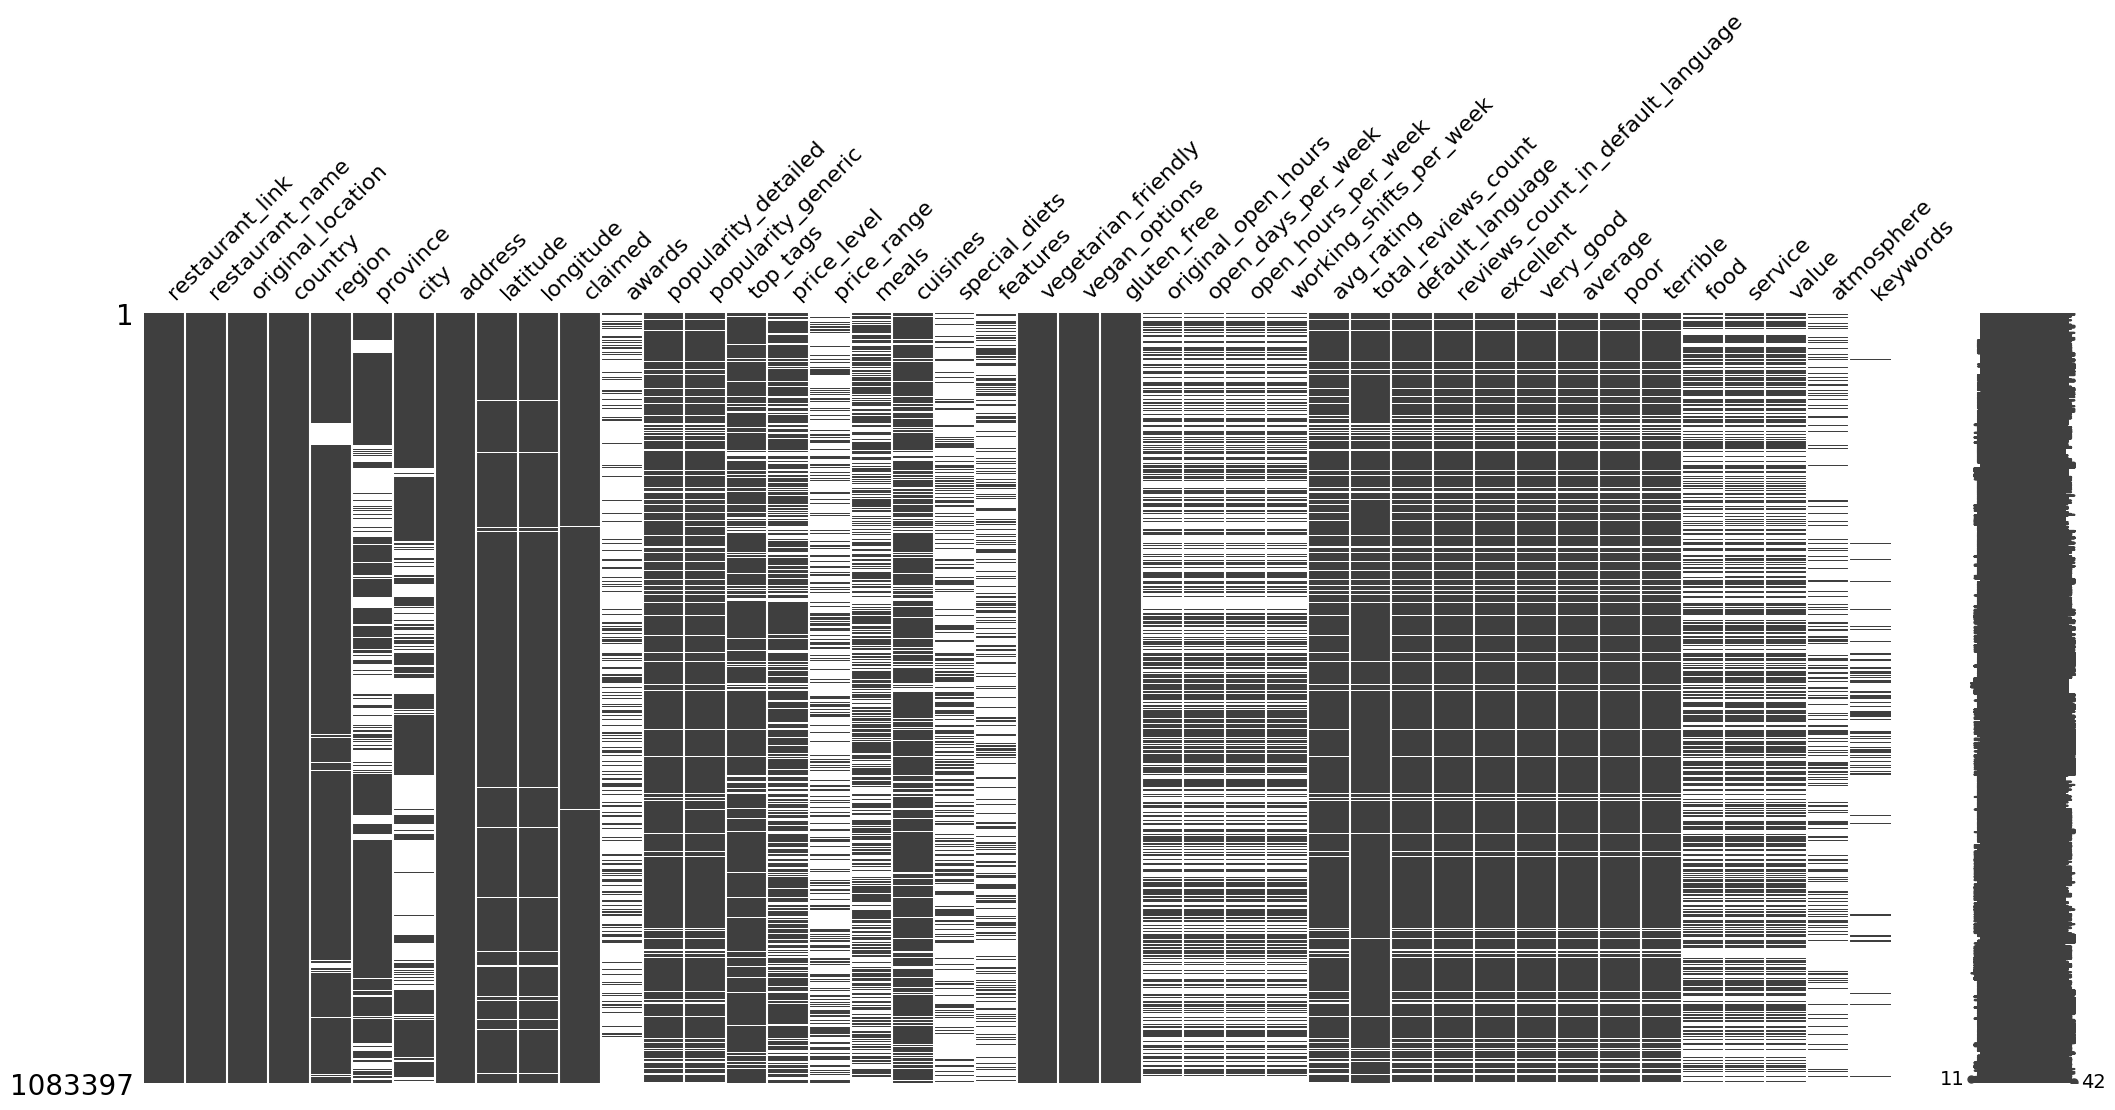

In [110]:
msno.matrix(rest_df)


### 1.2.1. Looking at columns with "," separator 

In [9]:
# rating of values in the column

# def rating_of_column_values(df, column, separator=', '):
#     df2 = df[list(df)]
#     df2['column_2'] = df2[column].str.split(separator)
#     tags_list = list(set().union(*df2['column_2'].dropna()))

#     tags_list_2 = []
#     for tag in tags_list:
#         tags_list_2.append([tag, df2['column_2'].dropna().map(set([tag]).issubset).fillna(False).value_counts()[True]])

#     tags_list_2 = sorted(tags_list_2, key=lambda x: x[1], reverse=True)
#     df2 = df2.drop(['column_2'], axis=1)
#     return tags_list_2



In [10]:
# columns with ', ' (amount and percentage)

for col in rest_df.select_dtypes(include='object').columns:
    rest_with_comma = len(rest_df[rest_df[col].str.contains(', ', na=False)])
    if rest_with_comma > 0:
        print("{0:<20s} {1:>10} {2:>10f}".format(col, rest_with_comma, round(rest_with_comma/rest_df.shape[0]*100, 2)))

restaurant_name            3930   0.360000
original_location       1083397 100.000000
city                          3   0.000000
address                 1074625  99.190000
awards                   214179  19.770000
top_tags                 850418  78.500000
meals                    522083  48.190000
cuisines                 627912  57.960000
special_diets            168200  15.530000
features                 257037  23.730000
original_open_hours      593832  54.810000
keywords                  99198   9.160000


In [11]:
rating_of_column_values(rest_df, 'awards', separator=', ')

[["Travellers' Choice", 147397],
 ['Certificate of Excellence 2017', 142887],
 ['Certificate of Excellence 2020', 140248],
 ['Certificate of Excellence 2019', 139995],
 ['Certificate of Excellence 2018', 138741],
 ['Certificate of Excellence 2016', 107686],
 ['Certificate of Excellence 2015', 66340],
 ['Certificate of Excellence 2014', 41445],
 ['Certificate of Excellence 2013', 31065],
 ['Certificate of Excellence 2012', 11377],
 ['Michelin 2021 for The Michelin Plate: Good cooking', 5796],
 ['Certificate of Excellence 2011', 4335],
 ['Michelin 2021 for Comfortable restaurant', 3687],
 ['Michelin 2021 for Simple restaurant', 3478],
 ['good value cooking', 1816],
 ['worth a stop!', 1672],
 ['Michelin 2020 for The Michelin Plate: Good cooking', 1366],
 ['Michelin 2021 for Bib Gourmand: good quality', 1323],
 ['Michelin 2021 for Very comfortable restaurant', 1301],
 ['Michelin 2021 for One Michelin Star: High quality cooking', 1292],
 ['Michelin 2020 for Comfortable restaurant', 1150],
 

In [12]:
rating_of_column_values(rest_df, 'top_tags', separator=', ')

[['Mid-range', 538207],
 ['Cheap Eats', 240351],
 ['Italian', 236822],
 ['European', 177712],
 ['Mediterranean', 155388],
 ['Vegetarian Friendly', 133520],
 ['Pizza', 113259],
 ['Cafe', 107793],
 ['French', 98892],
 ['Bar', 90677],
 ['Spanish', 82501],
 ['Seafood', 80241],
 ['British', 64133],
 ['Fast food', 58479],
 ['Pub', 53573],
 ['Asian', 45942],
 ['German', 36346],
 ['International', 32942],
 ['Quick Bites', 29544],
 ['Chinese', 29113],
 ['Dessert', 28969],
 ['Fine Dining', 28081],
 ['American', 27972],
 ['Greek', 26215],
 ['Indian', 21197],
 ['Japanese', 20717],
 ['Barbecue', 20511],
 ['Steakhouse', 18576],
 ['Portuguese', 17682],
 ['Vegan Options', 16240],
 ['Sushi', 15435],
 ['Healthy', 14077],
 ['Dutch', 14041],
 ['Bakeries', 13373],
 ['Grill', 13261],
 ['Belgian', 11558],
 ['Austrian', 11028],
 ['Central European', 11015],
 ['Turkish', 10264],
 ['Wine Bar', 9745],
 ['Contemporary', 9620],
 ['Thai', 9446],
 ['Polish', 9374],
 ['Brew Pub', 9062],
 ['Deli', 8498],
 ['Middle Eas

In [13]:
rating_of_column_values(rest_df, 'meals', separator=', ')

[['Dinner', 532366],
 ['Lunch', 511678],
 ['Breakfast', 181695],
 ['Drinks', 117450],
 ['Brunch', 101571],
 ['After-hours', 91200]]

In [14]:
rating_of_column_values(rest_df, 'cuisines', separator=', ')

[['Italian', 235823],
 ['European', 208436],
 ['Mediterranean', 173020],
 ['Pizza', 114070],
 ['Cafe', 109188],
 ['French', 98480],
 ['Spanish', 93191],
 ['Bar', 90508],
 ['Pub', 82113],
 ['Seafood', 81397],
 ['British', 67673],
 ['Fast food', 61154],
 ['Asian', 53658],
 ['German', 36236],
 ['International', 34727],
 ['Greek', 30774],
 ['Chinese', 29046],
 ['American', 27921],
 ['Barbecue', 26997],
 ['Healthy', 26168],
 ['Portuguese', 23781],
 ['Grill', 22019],
 ['Indian', 21119],
 ['Japanese', 20645],
 ['Central European', 20349],
 ['Steakhouse', 18511],
 ['Southern-Italian', 18191],
 ['Sushi', 17777],
 ['Wine Bar', 17482],
 ['Gastropub', 14764],
 ['Contemporary', 14665],
 ['Dutch', 14076],
 ['Diner', 13444],
 ['Deli', 11621],
 ['Middle Eastern', 11588],
 ['Central-Italian', 11582],
 ['Belgian', 11549],
 ['Turkish', 11318],
 ['Austrian', 11026],
 ['Thai', 11004],
 ['Street Food', 10743],
 ['Fusion', 10702],
 ['Northern-Italian', 10249],
 ['Polish', 9367],
 ['Brew Pub', 9145],
 ['Soups

In [15]:
rating_of_column_values(rest_df, 'special_diets', separator=', ')

[['Vegetarian Friendly', 324017],
 ['Vegan Options', 136597],
 ['Gluten Free Options', 123497],
 ['Halal', 6709],
 ['Kosher', 298]]

In [16]:
rating_of_column_values(rest_df, 'features', separator=', ')

[['Seating', 228439],
 ['Reservations', 215387],
 ['Table Service', 191467],
 ['Wheelchair Accessible', 146385],
 ['Serves Alcohol', 129553],
 ['Takeout', 94983],
 ['Outdoor Seating', 74512],
 ['Accepts Credit Cards', 58121],
 ['Highchairs Available', 52849],
 ['Full Bar', 49332],
 ['Free Wifi', 41665],
 ['Parking Available', 27316],
 ['Wine and Beer', 25291],
 ['Delivery', 18758],
 ['Television', 17841],
 ['Accepts Visa', 17558],
 ['Accepts Mastercard', 16681],
 ['Street Parking', 14063],
 ['Free off-street parking', 12344],
 ['Digital Payments', 10863],
 ['Validated Parking', 7949],
 ['Accepts American Express', 7707],
 ['Gift Cards Available', 6103],
 ['Cash Only', 6046],
 ['Private Dining', 5075],
 ['Dog Friendly', 5064],
 ['Buffet', 4562],
 ['Family style', 4423],
 ['Live Music', 4080],
 ['Non-smoking restaurants', 2607],
 ['Waterfront', 1722],
 ['Accepts Discover', 1262],
 ['Valet Parking', 1155],
 ['Playgrounds', 1141],
 ['Beach', 668],
 ['Drive Thru', 499],
 ['BYOB', 494],
 ['S

In [17]:
# too long
# rating_of_column_values(rest_df, 'original_open_hours', separator=', ')

In [18]:
# too long
# rating_of_column_values(rest_df, 'keywords', separator=', ')

In [19]:
rating_of_column_values(rest_df, 'country', separator=', ')

[['Italy', 224763],
 ['Spain', 157479],
 ['France', 155288],
 ['England', 144681],
 ['Germany', 115333],
 ['Greece', 33763],
 ['Portugal', 32592],
 ['The Netherlands', 29792],
 ['Poland', 24698],
 ['Belgium', 23711],
 ['Austria', 20487],
 ['Sweden', 18555],
 ['Czech Republic', 14844],
 ['Scotland', 14215],
 ['Ireland', 11203],
 ['Denmark', 9485],
 ['Wales', 9134],
 ['Croatia', 8375],
 ['Romania', 7842],
 ['Hungary', 7431],
 ['Finland', 7372],
 ['Bulgaria', 4469],
 ['Slovakia', 4251],
 ['Northern Ireland', 3634]]

### 1.2.2. Fixing the country name

In [20]:
def theUK(country):
    if country in ['England', 'Scotland', 'Wales', 'Northern Ireland']:
        return 'United Kingdom'
    else:
        return country

def theNe(country):
    if country == 'Netherlands':
        return 'The Netherlands'
    else:
        return country

subreg = {
    'Italy': 'South',
    'Spain': 'South',
    'France': 'West',
    'United Kingdom': 'North',
#     'England': 'North',
    'Germany': 'West',
    'Greece': 'South',
    'Portugal': 'South',
    'The Netherlands': 'West',
    'Poland': 'East',
    'Belgium': 'West',
    'Austria': 'West',
    'Sweden': 'North',
    'Czech Republic': 'East',
#     'Scotland': 'North',
    'Ireland': 'North',
    'Denmark': 'North',
#     'Wales': 'North',
    'Croatia': 'South',
    'Romania': 'East',
    'Hungary': 'East',
    'Finland': 'North',
    'Bulgaria': 'East',
    'Slovakia': 'East'
#     'Northern Ireland': 'North'
}


In [42]:
rest_df_upd = copy.deepcopy(rest_df)
# df_upd = df_upd.drop(['column_2'], axis=1)
rest_df_upd = rest_df_upd.drop(['original_location'], axis=1)
rest_df_upd['country_origin'] = rest_df_upd['country']
rest_df_upd['country'] = rest_df_upd.apply(lambda x: theUK(x['country']),axis=1)
rest_df_upd['subregion'] = rest_df_upd.apply(lambda x: subreg[x['country']],axis=1)

rest_df_upd.head()

,restaurant_link,restaurant_name,country,region,province,city,address,latitude,longitude,claimed,...,average,poor,terrible,food,service,value,atmosphere,keywords,country_origin,subregion
0,g10001637-d10002227,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,Claimed,...,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN,France,West
1,g10001637-d14975787,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,Unclaimed,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,France,West
2,g10002858-d4586832,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,Claimed,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,France,West
3,g10002986-d3510044,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,Claimed,...,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,France,West
4,g10022428-d9767191,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,Unclaimed,...,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,France,West


### 1.2.3. Replacing N/Y values with boolean

In [43]:
boolean_dict = {
    'N': False,
    'Y': True
}

flag_columns = ['vegetarian_friendly','vegan_options','gluten_free']
for col in flag_columns:
    rest_df_upd = rest_df_upd.replace({col: boolean_dict})

rest_df_upd[flag_columns].head()

,vegetarian_friendly,vegan_options,gluten_free
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [ ]:
# price_level_dict = {
#     '€': 'Cheap Eats',
#     '€€-€€€': 'Mid-range',
#     '€€€€': 'Fine Dining'
# }


### 1.2.4. Replacing 'price_range' with numerical columns

In [29]:
# to parse price_range in min and max values

def price_range_to_2_columns(price_range):
    for substr in [",", "€", "CHF ", "CHF\xa0"]:  # \xa0 = no-break space
        price_range = price_range.replace(substr, "")
        
    price = price_range.split('-')
    price_min = int(price[0])
    price_max = int(price[1])

    return [price_min, price_max]

def correct_price_range(cell):
    price_range_dict = {}
    if cell is None:
        price_min, price_max = None, None
    else:
        price_min, price_max = price_range_to_2_columns(cell)
    price_range_dict['price_min'] = price_min
    price_range_dict['price_max'] = price_max
    return price_range_dict

# price_range = '€10-€30'
# price_range = 'CHF 6-CHF 17'
# correct_price_range(price_range)


In [46]:
price_df = rest_df_upd[['restaurant_link','price_range']].dropna().reset_index(drop=True)
price_df = price_df['price_range'].apply(lambda x: pd.Series(correct_price_range(x)))
price_df2 = rest_df_upd[['restaurant_link']].merge(price_df, left_index=True, right_index=True)

rest_df_upd = rest_df_upd.merge(price_df2, on='restaurant_link', how='left')
# rest_df_upd.head()

In [94]:
price_df2.columns

Index(['restaurant_link', 'price_min', 'price_max'], dtype='object')

In [97]:
price_df_notna = rest_df_upd[['restaurant_link', 'country', 'region', 'province', 'city', 'avg_rating', 'total_reviews_count', 'price_level', 'price_min', 'price_max']][rest_df_upd['price_min'].notna()]
price_df_notna


,restaurant_link,country,region,province,city,avg_rating,total_reviews_count,price_level,price_min,price_max
0,g10001637-d10002227,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,4.0,36.0,€,14.0,29.0
1,g10001637-d14975787,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,4.0,5.0,€,8.0,17.0
2,g10002858-d4586832,France,Centre-Val de Loire,Berry,Rivarennes,5.0,13.0,€,10.0,35.0
3,g10002986-d3510044,France,Nouvelle-Aquitaine,Correze,Lacelle,4.0,34.0,€,12.0,26.0
4,g10022428-d9767191,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,4.5,11.0,€€-€€€,12.0,30.0
...,...,...,...,...,...,...,...,...,...,...
304322,g1865661-d5973283,Austria,Lower Austria,NaN,Wiener Neudorf,2.5,5.0,NaN,1.0,11.0
304323,g1865661-d7253780,Austria,Lower Austria,NaN,Wiener Neudorf,4.0,15.0,€€-€€€,1.0,11.0
304324,g1865661-d8026222,Austria,Lower Austria,NaN,Wiener Neudorf,4.0,50.0,€€-€€€,2.0,12.0
304325,g1865661-d8148295,Austria,Lower Austria,NaN,Wiener Neudorf,4.5,11.0,€€-€€€,2.0,20.0


In [108]:
price_df_notna.to_csv('restaurant_price_base.csv', sep=';', encoding='utf-8', index=False)

### 1.2.5. Replacing 'original_open_hours' with datetime columns

In [35]:
# to convert original_open_hours to datetime fields

import json
from datetime import datetime
from datetime import timedelta
import statistics

def ifNone(val):
    if val is None:
        return timedelta(seconds=0)
    else:
        return val

def day_schedule_to_4_columns(day_list):
    t_list = []
    for tt in day_list:
        for t in tt.split('-'):
            t_list.append(datetime.strptime('01/01/22 '+t+':00', '%d/%m/%y %H:%M:%S'))
#     если закрывается за полночь, то сместить в следующие сутки:
    if t_list != [] and t_list[-1] < t_list[0]:
        one_day = timedelta(days=1)
        t_list[-1] += one_day
    return t_list

def dict_by_cell(test_cell):
    test_dict = {}
    for key in json.loads(test_cell).keys():
        open_dttm = None
        close_dttm = None
        start_break_dttm = None
        end_break_dttm = None
        t_list = day_schedule_to_4_columns(json.loads(test_cell)[key])

        if t_list != []:
            open_dttm = t_list[0]
            close_dttm = t_list[-1]
            if t_list[1] != t_list[-1]:
                start_break_dttm = t_list[1]
                end_break_dttm = t_list[2]
            else:
                start_break_dttm = None
                end_break_dttm = None

        test_dict[key] = {
            'weekend_flg': (False, True)[key in ['Sat', 'Sun']],
            'open_dttm': open_dttm,
            'close_dttm': close_dttm,
            'start_break_dttm': start_break_dttm,
            'end_break_dttm': end_break_dttm,
            'open_hours': (ifNone(close_dttm)-ifNone(open_dttm))-(ifNone(end_break_dttm)-ifNone(start_break_dttm)),
    #         (test_dict[key]['close_dttm']-test_dict[key]['open_dttm'])-(ifNone(test_dict[key]['end_break_dttm'])-ifNone(test_dict[key]['start_break_dttm']))
            'break_hours': (ifNone(end_break_dttm)-ifNone(start_break_dttm))
        }
    return test_dict
    
def new_schedule_parameters(test_dict):
    schedule_dict = {}
    empty_flg = (False, True)[sum([1 for key in test_dict.keys() if test_dict[key]['open_dttm'] is not None]) >= 1]
    
    if empty_flg == 1:
        min_open_dttm = min([test_dict[key]['open_dttm'] for key in test_dict.keys() if test_dict[key]['open_dttm'] is not None])
#         min_open_sec = (min_open_dttm - datetime.datetime(1970,1,1)).total_seconds()
        min_open_sec = min_open_dttm.timestamp()
        max_close_dttm = max([test_dict[key]['close_dttm'] for key in test_dict.keys() if test_dict[key]['close_dttm'] is not None])
        max_close_sec = max_close_dttm.timestamp()

        break_flg = (False, True)[sum([1 for key in test_dict.keys() if test_dict[key]['start_break_dttm'] is not None]) >= 1]
        if len([test_dict[key]['break_hours'] for key in test_dict.keys() if test_dict[key]['start_break_dttm'] is not None]) > 0:
            max_break_hours = max([test_dict[key]['break_hours'] for key in test_dict.keys() if test_dict[key]['start_break_dttm'] is not None])
        else:
            max_break_hours = timedelta(seconds=0)
        
        # statistics.median()
        if len([test_dict[key]['open_hours'] for key in test_dict.keys() if test_dict[key]['open_dttm'] is not None and test_dict[key]['weekend_flg'] is False]) > 0:
            max_no_weekend_hours = max([test_dict[key]['open_hours'] for key in test_dict.keys() if test_dict[key]['open_dttm'] is not None and test_dict[key]['weekend_flg'] is False])
        else:
            max_no_weekend_hours = timedelta(seconds=0)
        if len([test_dict[key]['open_hours'] for key in test_dict.keys() if test_dict[key]['open_dttm'] is not None and test_dict[key]['weekend_flg'] is True]) > 0:
            max_weekend_hours = max([test_dict[key]['open_hours'] for key in test_dict.keys() if test_dict[key]['open_dttm'] is not None and test_dict[key]['weekend_flg'] is True])
        else:
            max_weekend_hours = timedelta(seconds=0)
            
        schedule_dict['min_open_dttm'] = min_open_dttm
        schedule_dict['min_open_sec'] = min_open_sec
        schedule_dict['max_close_dttm'] = max_close_dttm
        schedule_dict['max_close_sec'] = max_close_sec
        schedule_dict['break_flg'] = break_flg
        schedule_dict['max_break_hours'] = max_break_hours
        schedule_dict['max_no_weekend_hours'] = max_no_weekend_hours
        schedule_dict['max_weekend_hours'] = max_weekend_hours

        for key in test_dict.keys():
            schedule_dict[str.lower('open_%s_hours' % key)] = test_dict[key]['open_hours']
    
    return schedule_dict


In [57]:
schedule_df = rest_df_upd[['restaurant_link','original_open_hours']].dropna().reset_index(drop=True)
schedule_df = schedule_df['original_open_hours'].apply(lambda x: pd.Series(new_schedule_parameters(dict_by_cell(x))))
schedule_df2 = rest_df_upd[['restaurant_link']].merge(schedule_df, left_index=True, right_index=True)

rest_df_upd = rest_df_upd.merge(schedule_df2, on='restaurant_link', how='left')
rest_df_upd.head()

,restaurant_link,restaurant_name,country,region,province,city,address,latitude,longitude,claimed,...,max_break_hours,max_no_weekend_hours,max_weekend_hours,open_mon_hours,open_tue_hours,open_wed_hours,open_thu_hours,open_fri_hours,open_sat_hours,open_sun_hours
0,g10001637-d10002227,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,Claimed,...,0 days 04:30:00,0 days 08:30:00,0 days 08:30:00,0 days 05:30:00,0 days 08:00:00,0 days 08:00:00,0 days 08:00:00,0 days 08:30:00,0 days 08:30:00,0 days 07:00:00
1,g10001637-d14975787,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,Unclaimed,...,0 days 04:00:00,0 days 06:00:00,0 days 06:00:00,0 days 00:00:00,0 days 00:00:00,0 days 06:00:00,0 days 06:00:00,0 days 06:00:00,0 days 06:00:00,0 days 06:00:00
2,g10002858-d4586832,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,Claimed,...,0 days 00:00:00,0 days 04:00:00,0 days 04:00:00,0 days 00:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00
3,g10002986-d3510044,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,Claimed,...,0 days 05:00:00,0 days 04:00:00,0 days 04:00:00,0 days 00:00:00,0 days 00:00:00,0 days 02:00:00,0 days 02:00:00,0 days 04:00:00,0 days 02:00:00,0 days 04:00:00
4,g10022428-d9767191,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,Unclaimed,...,0 days 00:00:00,0 days 12:00:00,0 days 08:00:00,0 days 00:00:00,0 days 07:00:00,0 days 07:00:00,0 days 12:00:00,0 days 12:00:00,0 days 07:00:00,0 days 08:00:00


In [99]:
schedule_df2.columns

Index(['restaurant_link', 'min_open_dttm', 'min_open_sec', 'max_close_dttm',
       'max_close_sec', 'break_flg', 'max_break_hours', 'max_no_weekend_hours',
       'max_weekend_hours', 'open_mon_hours', 'open_tue_hours',
       'open_wed_hours', 'open_thu_hours', 'open_fri_hours', 'open_sat_hours',
       'open_sun_hours'],
      dtype='object')

In [106]:
schedule_df_notna = rest_df_upd[list(schedule_df2.columns) + ['country', 'avg_rating', 'total_reviews_count']][rest_df_upd['min_open_dttm'].notna()]
schedule_df_notna


,restaurant_link,min_open_dttm,min_open_sec,max_close_dttm,max_close_sec,break_flg,max_break_hours,max_no_weekend_hours,country,avg_rating,total_reviews_count
0,g10001637-d10002227,2022-01-01 09:00:00,1.641013e+09,2022-01-01 22:00:00,1.641060e+09,True,0 days 04:30:00,0 days 08:30:00,France,4.0,36.0
1,g10001637-d14975787,2022-01-01 12:00:00,1.641024e+09,2022-01-01 22:00:00,1.641060e+09,True,0 days 04:00:00,0 days 06:00:00,France,4.0,5.0
2,g10002858-d4586832,2022-01-01 10:00:00,1.641017e+09,2022-01-01 14:00:00,1.641031e+09,False,0 days 00:00:00,0 days 04:00:00,France,5.0,13.0
3,g10002986-d3510044,2022-01-01 12:00:00,1.641024e+09,2022-01-01 21:00:00,1.641056e+09,True,0 days 05:00:00,0 days 04:00:00,France,4.0,34.0
4,g10022428-d9767191,2022-01-01 09:00:00,1.641013e+09,2022-01-01 23:45:00,1.641066e+09,False,0 days 00:00:00,0 days 12:00:00,France,4.5,11.0
...,...,...,...,...,...,...,...,...,...,...,...
593827,g1916708-d23228508,2022-01-01 10:00:00,1.641017e+09,2022-01-02 00:00:00,1.641067e+09,False,0 days 00:00:00,0 days 14:00:00,United Kingdom,5.0,2.0
593828,g1916708-d3650547,2022-01-01 10:00:00,1.641017e+09,2022-01-01 23:45:00,1.641066e+09,False,0 days 00:00:00,0 days 13:45:00,United Kingdom,4.0,126.0
593829,g1916708-d4374352,2022-01-01 10:00:00,1.641017e+09,2022-01-01 22:00:00,1.641060e+09,False,0 days 00:00:00,0 days 12:00:00,United Kingdom,4.0,47.0
593830,g1916708-d790025,2022-01-01 08:00:00,1.641010e+09,2022-01-01 22:00:00,1.641060e+09,False,0 days 00:00:00,0 days 14:00:00,United Kingdom,4.5,229.0


In [107]:
# 177 MB
# schedule_df_notna.to_csv('restaurant_schedule_base.csv', sep=';', encoding='utf-8', index=False)

### 1.2.6. Dropping unnecessary columns

In [75]:
rest_df_upd.columns

Index(['restaurant_link', 'restaurant_name', 'country', 'region', 'province',
       'city', 'address', 'latitude', 'longitude', 'claimed', 'awards',
       'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level',
       'price_range', 'meals', 'cuisines', 'special_diets', 'features',
       'vegetarian_friendly', 'vegan_options', 'gluten_free',
       'original_open_hours', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week', 'avg_rating', 'total_reviews_count',
       'default_language', 'reviews_count_in_default_language', 'excellent',
       'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value',
       'atmosphere', 'keywords', 'country_origin', 'subregion', 'price_min',
       'price_max', 'min_open_dttm', 'min_open_sec', 'max_close_dttm',
       'max_close_sec', 'break_flg', 'max_break_hours', 'max_no_weekend_hours',
       'max_weekend_hours', 'open_mon_hours', 'open_tue_hours',
       'open_wed_hours', 'open_thu_hours', 

In [82]:
drop_columns = [
    'restaurant_name',
#     'original_location', # already deleted
    'address',
    'claimed',
    'awards',
    'popularity_detailed',
    'popularity_generic',
    'top_tags',
    'price_range', # replaced with numerical
    'original_open_hours', # replaced with datetime
    'open_days_per_week',
    'open_hours_per_week',
    'working_shifts_per_week',
    
    'vegetarian_friendly','vegan_options','gluten_free', # duplicated in 'special_diets'

    'excellent','very_good','average','poor','terrible',
    'food','service','value','atmosphere',
    'default_language',
    'reviews_count_in_default_language',
    'keywords',  # a lot of NaN
    
    'country_origin', 'subregion',
]

In [83]:
rest_df_short = rest_df_upd.drop(drop_columns, axis=1)
rest_df_short.head()

,restaurant_link,country,region,province,city,latitude,longitude,price_level,meals,cuisines,...,max_break_hours,max_no_weekend_hours,max_weekend_hours,open_mon_hours,open_tue_hours,open_wed_hours,open_thu_hours,open_fri_hours,open_sat_hours,open_sun_hours
0,g10001637-d10002227,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.961674,1.169131,€,"Lunch, Dinner",French,...,0 days 04:30:00,0 days 08:30:00,0 days 08:30:00,0 days 05:30:00,0 days 08:00:00,0 days 08:00:00,0 days 08:00:00,0 days 08:30:00,0 days 08:30:00,0 days 07:00:00
1,g10001637-d14975787,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.957040,1.205480,€,NaN,NaN,...,0 days 04:00:00,0 days 06:00:00,0 days 06:00:00,0 days 00:00:00,0 days 00:00:00,0 days 06:00:00,0 days 06:00:00,0 days 06:00:00,0 days 06:00:00,0 days 06:00:00
2,g10002858-d4586832,France,Centre-Val de Loire,Berry,Rivarennes,46.635895,1.386133,€,"Dinner, Lunch, Drinks","French, European",...,0 days 00:00:00,0 days 04:00:00,0 days 04:00:00,0 days 00:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00,0 days 04:00:00
3,g10002986-d3510044,France,Nouvelle-Aquitaine,Correze,Lacelle,45.642610,1.824460,€,"Lunch, Dinner",French,...,0 days 05:00:00,0 days 04:00:00,0 days 04:00:00,0 days 00:00:00,0 days 00:00:00,0 days 02:00:00,0 days 02:00:00,0 days 04:00:00,0 days 02:00:00,0 days 04:00:00
4,g10022428-d9767191,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,44.208860,2.960470,€€-€€€,"Lunch, Dinner",French,...,0 days 00:00:00,0 days 12:00:00,0 days 08:00:00,0 days 00:00:00,0 days 07:00:00,0 days 07:00:00,0 days 12:00:00,0 days 12:00:00,0 days 07:00:00,0 days 08:00:00


In [84]:
rest_df_short.columns

Index(['restaurant_link', 'country', 'region', 'province', 'city', 'latitude',
       'longitude', 'price_level', 'meals', 'cuisines', 'special_diets',
       'features', 'avg_rating', 'total_reviews_count', 'price_min',
       'price_max', 'min_open_dttm', 'min_open_sec', 'max_close_dttm',
       'max_close_sec', 'break_flg', 'max_break_hours', 'max_no_weekend_hours',
       'max_weekend_hours', 'open_mon_hours', 'open_tue_hours',
       'open_wed_hours', 'open_thu_hours', 'open_fri_hours', 'open_sat_hours',
       'open_sun_hours'],
      dtype='object')

In [49]:
# dummies without not popular options of feature columns

# def features_to_flags(df, feature_col_list, threshold):
#     for col in feature_col_list:
#         top_tags = [f[0] for f in rating_of_column_values(df, col, separator=', ') if f[1] >= threshold * len(df)]
#         for t in top_tags:
#             df[col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
#         df = df.drop(col, axis=1)
#     return df


In [85]:
rest_df_short_test = rest_df_short[list(rest_df_short)]
rest_df_short_test = rest_df_short_test.dropna(subset = ['price_level', 'meals', 'cuisines', 'features'])

# split these feature columns by comma and get dumimes
rest_df_short_test = features_to_flags(rest_df_short_test, ['meals', 'special_diets'], 0)

print(rest_df_short_test.shape)


(198446, 40)


In [86]:
rest_df_short_test.columns

Index(['restaurant_link', 'country', 'region', 'province', 'city', 'latitude',
       'longitude', 'price_level', 'cuisines', 'features', 'avg_rating',
       'total_reviews_count', 'price_min', 'price_max', 'min_open_dttm',
       'min_open_sec', 'max_close_dttm', 'max_close_sec', 'break_flg',
       'max_break_hours', 'max_no_weekend_hours', 'max_weekend_hours',
       'open_mon_hours', 'open_tue_hours', 'open_wed_hours', 'open_thu_hours',
       'open_fri_hours', 'open_sat_hours', 'open_sun_hours', 'meals_Dinner',
       'meals_Lunch', 'meals_Breakfast', 'meals_Drinks', 'meals_Brunch',
       'meals_After-hours', 'special_diets_Vegetarian Friendly',
       'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
       'special_diets_Halal', 'special_diets_Kosher'],
      dtype='object')

In [88]:
rest_df_short_test.head()

,restaurant_link,country,region,province,city,latitude,longitude,price_level,cuisines,features,...,meals_Lunch,meals_Breakfast,meals_Drinks,meals_Brunch,meals_After-hours,special_diets_Vegetarian Friendly,special_diets_Gluten Free Options,special_diets_Vegan Options,special_diets_Halal,special_diets_Kosher
0,g10001637-d10002227,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.961674,1.169131,€,French,"Reservations, Seating, Wheelchair Accessible, ...",...,1,0,0,0,0,0,0,0,0,0
2,g10002858-d4586832,France,Centre-Val de Loire,Berry,Rivarennes,46.635895,1.386133,€,"French, European","Reservations, Seating, Table Service, Wheelcha...",...,1,0,1,0,0,0,0,0,0,0
3,g10002986-d3510044,France,Nouvelle-Aquitaine,Correze,Lacelle,45.642610,1.824460,€,French,"Reservations, Seating, Serves Alcohol, Table S...",...,1,0,0,0,0,0,0,0,0,0
4,g10022428-d9767191,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,44.208860,2.960470,€€-€€€,French,"Reservations, Seating, Wheelchair Accessible, ...",...,1,0,0,0,0,0,0,0,0,0
10,g10055971-d10040330,France,Auvergne-Rhone-Alpes,Ain,Journans,46.144340,5.331200,€€-€€€,French,"Reservations, Seating, Table Service, Serves A...",...,1,0,0,0,0,0,0,0,0,0


<a id="base"></a>

# 2. Saving the base dataset

In [90]:
rest_df_short_test.to_csv('restaurant_base.csv', sep=';', encoding='utf-8', index=False)